<a href="https://colab.research.google.com/github/RaymondLeong94/DS-Phase-3-Project/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission 2/2

- Program: Flatiron DS Flex 60 weeks

- Scheduled review date/time:

- Topic: Yelp NLP project 

- Name: Raymond Leong

- Instructor Name: Morgan Jones 
____________________________________________________________

# Introduction: Solving Problems with Natural Language Processing
___________________

Hi! Welcome to my first indepth NLP project that focuses on yelp reviews in order to help improve businesses by examining nouns and adjectives through a word2vec model followed by a Neural Network to maximize accuracy of the predictions. 

**This is the final notebook for this project and the first one can be found [here](https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebooks/Notebook1%20EDA.ipynb)** 

The project is focused on Natural Language Procesing and analyzing text from Yelp's database in order to extract information related to the perfomance of a restuarant (the amount of stars it has). Natural Language processing has five rules obtained from [communication community](https://www.communicationcommunity.com/5-domains-of-language/): Fortunately we can get the syntax, semantics and pragmatics through NLP but we cannot obtain the tone of the voice and this project has potential biases from the reviwer thus influenting the pragmatics. Overall, the following diagram is important because it keeps us centered on the business approach mentioned in notebook 1: How do words influence ratings?

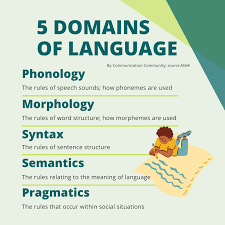

We will utilize 3 branches of lingustics in this notebook- morphology, syntax and semantics: 

- Morphology can help introduce the most prominent prefixes, suffixes, stems rootwords according to communication community.

- Syntax can look at the sentance through parsing we can see what the sentances look like

- Semantics, mainly adjectives and nouns in our case, are helpful when we consider the meaning of the words themselves.



# Business Problem and Stakeholders
______________

When COVID occured, Ubereats, Door Dash and Grubhub soared in popularity when restaurants were closed- and now that restaurants are opening back up, there comes a need to review the data from the yelp database to help restaurants opening up. **The main issue is that there were no waiters during covid, thus reintroducing staff has its costs** However, owners are struggling to allocate their resources properly and do not know where to invest in either: their service (now that everyone is coming back to dining) or food quality. 

Stakeholder

Mark Cuban is a huge investor in Philledelphia restaurants and has an average rating of 3.5 stars across his restaurants.

The job is to solve a classification problem (restaurants higher in 3.5 star rating and also lower), by looking at relevent nouns and adjectives with a certain accuracy to predict whether to invest in food quality or service.


# Data Understanding and preparing the data for analysis
______________


The following is the ERD for the yelp database, our main three files where we analyze text is from tips and reviews JSON files. Business serves as a junction between the two. As you can see from the results of notebook 1, we have chosen to look at reviews instead of tips.

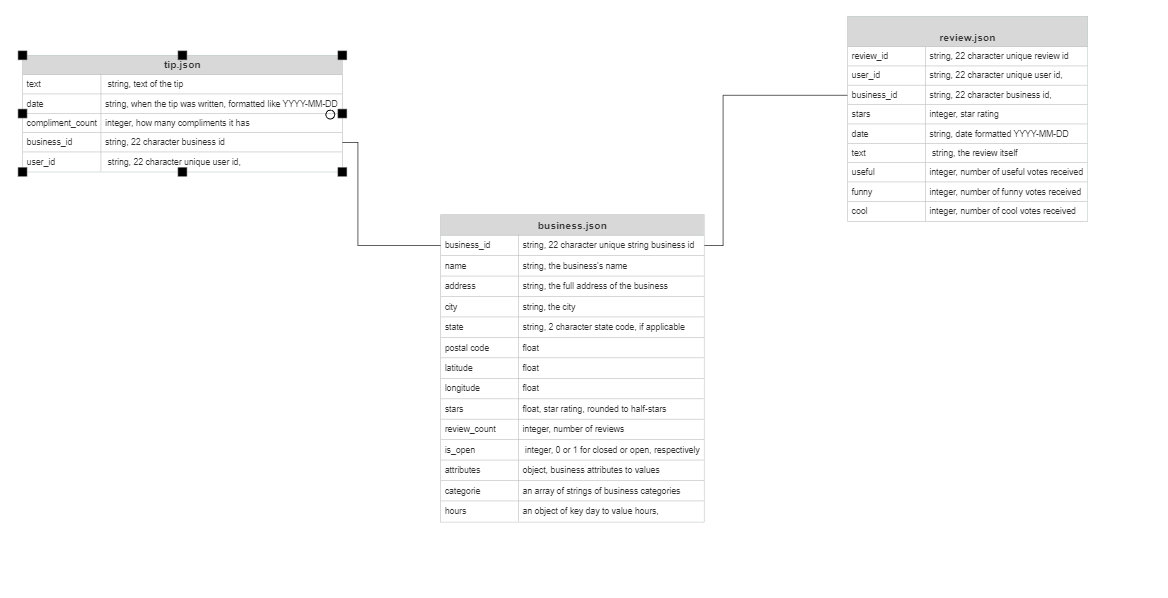

##  Data Understanding: Recapping Notebook 1's results

**Notebook 1 results** 

From Notebook 1 we know that the dataset comes from Yelp's Database, and while we only utilize three of these tables (since review and tips provide our corpus of text- furthermore business.json has the unique databases We were looking at previously. We also know that the tips.json is much more abbreviated than the reviews and thus has a less amount of text to work with. 

The conclusion from the observation seen notebook 1 was that the vader score was vastly larger for neutral reviews in tips than reviews.


**File descriptions**

The various attributes of the business.json file are it's columns. It contains: the id of the buisness, business name, address, city, state, postal code, lat, long, stars, review count, is it open?, attributes, categories, and hours.

Furthermore, we are only loading specific columns in the review.json file- we only want to load in the business id stars and text and expand our dataset frome there, while we can use other features of this dataset such as cool, funny etc we are limiting our observations to the corpus only.



# Data Preparation
____________________


Again as stated in notebook 1, the following datasets can be obtained from:

- Yelp's dataset download: https://www.yelp.com/dataset/download

- Yelp's dataset description: https://www.yelp.com/dataset/documentation/main

*Note you must fill out the form before you can download the files* 

*Please also make sure your hardware can run this code: the following is the hardware used*
- Processor: AMD Ryzen 7 2700 Eight-Cores

- RAM space 16GB

- Motherboard: ROG STRIX B450-F GAMING

- Google Collab Pro is recommended but not requi
While we navigate to google collab, we have a different way of loading in the data once it is in your drive.

We know that NLP is hardware intensive, thus we will be running most of our code for reviews on the cloud compared to local. The following data preparation code will give us a small introduction into our dataset



## We need load in the two dataframes: review.json and business.json and merge them to prepare the data

The output dataframe is rows of reviews for a variety of restaurants in Philledelphia. This step is crucial in order to perform EDA and NLP techniques so that we do not generalize our results exhibited in notebook 1
________

In [1]:
#We will utilize Google collab and Google Drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
#change directory
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
#import necessary drives
import warnings
from pandas.core.common import SettingWithCopyWarning#warning drive to show deprececiated cells
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import pandas as pd #our standard library to visualize. v1.5.3
import json #type of dataframe we're working with

The following function is used to load in reviews in a format that can take in 200.000 rows every time.

In [4]:
#the following function was from: 
#https://thedatafrog.com/en/articles/text-mining-pandas-yelp/
#author: colin
#publisher: The dataFrog
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

#open the output file and set the encoding to utf 8
ifile = open('/content/gdrive/MyDrive/yelp_academic_dataset_review-001.json', encoding = 'utf-8', errors = 'ignore') 

#due to limitations in hardware, set stop to a # to deliver the amount of rows you want 
stop = 200000

#set a list

all_data = list()

#given the file name for yelp (ifile), this function will take each line by line,
#assign a unique index value for each line and store it as a list to all_data 
for i, line in enumerate(ifile):
#if i can be divided by 10,000- then a 10000 lines has been processed until the int for stop has occured 
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'business_id'])


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


Load in Unique business: expand attributes and hours

In [5]:
pd.set_option('mode.chained_assignment', None)
business = pd.read_json('/content/gdrive/MyDrive/yelp_academic_dataset_business.json', lines =True)
#load in attributes and hours dictionary columns as normalized columns so that we can expand them and use potential feature engineering to solve our business problem
business_attributes = pd.json_normalize(business['attributes'])
business_hours = pd.json_normalize(business['hours'])


Combine the dataframes by dropping the attributes and hours column and remerging the df back together after attributes and hours gets normalized. Aditionally we would also expand the categories column and filter out the Philly restaurants

In [6]:
#use result as a dummy for a consecutive merging
result = pd.concat([business, business_attributes], axis=1,)

In [7]:
#merge again
business = pd.concat([result, business_hours], axis =1)

In [8]:
#this function drops the cateogries and split like a .explode function except it creates multiple row entries by expanding whenever  the str ","" is present. 
#reset index and rename it after adding it in
business_data = business.drop('categories', axis=1).join(business['categories'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('establishment_type'))

In [9]:
#set this as type str for regex prep
business_data['establishment_type'] = business_data['establishment_type'].astype('str')


Regex is a library that helps us obtain the same word despite case sensitivity and some small errors. For instance Regex is necessary for making sure "Restuarant" is the output and that the spacing in between ' and the first letter in some establishment types are different (example: ' Restaurants' and 'Restaurants') 

In [10]:
#import re, find the data that only contains resturants and food with no case sensitivity
#restaurants and food are the type of establishments we are looking for
import re 
business_dataprep = business_data[business_data['establishment_type'].str.contains('.*Restaurants.*')| business_data['establishment_type'].str.contains('.*Food.*')]

In [11]:
#get the city of Philadelphia only for our stakeholders
geo_example_philly= business_dataprep[business_dataprep['city'] == ("Philadelphia")]

In [12]:
#get the city of Philadelphia only for our stakeholders
geo_example_philly= business_dataprep[business_dataprep['city'] == ("Philadelphia")]

In [13]:
#this merges all of our restaurants
yelp_philly_merge= pd.merge(geo_example_philly, yelp_reviews, on='business_id', how ="left")

In [14]:
#drop columns where there are no text
yelp_philly_merge =  yelp_philly_merge.dropna(subset = ['text'])

In [15]:
#looking at the columns
yelp_philly_merge.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count', 'is_open', 'attributes', 'hours', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience', 'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'establishment_type', 'stars_y', 'text', 'user_id'], dtype='object')

Much of this has been explored in previous notebooks:

- The attributes and hours of the restaurants have been dissolved into how the restaurant operates we should be looking at if any of these words appear later on in our analysis with the corpa 

- Stars x is the one of star of the restaurant by the overall majority
Stars y is the one of stars of the specific reviewer

In [16]:
#we have 37492 entries
print(yelp_philly_merge.shape)

(37492, 63)


In [17]:
#and they're all in philladelphia 
yelp_philly_merge[yelp_philly_merge['city'] == ("Philadelphia")].shape

(37492, 63)

In [18]:
#finding unique buisnesses within this dataset
yelp_philly_merge.business_id.nunique()

626

## Conclusion for data preparation

**The dataframe yelp_philly_merge is now complete**

As we can see, for this nlp project we have 626 unique restaurants with 37.492 reviews that we can examine using star x as the cumulative output and star y as the subjective output for reasons stated above. For our purposes in this notebook we will be looking at star_x because the output has already been averaged for us

The next step is scrubbing the text data in order to obtain a more representative form of the text.

# Data Scrubbing
_______________

We need to make the adjustments due to the context of the review being related to the food industry. 


## Step One: Cleaning with Morphological analysis

Morphological analysis means cleaning the data into a usable form to recognize and analyze word structures ([AlgoScale](https://algoscale.com/blog/a-guide-to-the-5-nlp-phases/#:~:text=Lexical%20or%20Morphological%20Analysis%20is,paragraphs%2C%20phrases%2C%20and%20words.)) This is aboslutely necessary in order to make accurate recommendations to improving quality of service or food.

**The following will be achieved in the next code cell**

#### Part of Speech tagging
This is simply taking the refurbished text and associate each word with a proper label representing nouns, adjectives, adverbs etc. This is important in extracting the nouns and adjectives we need.

#### Lemmentization
In the following cell we will remove endings and prefixes to obtain the proper "lemma", which is necessary to ensure that our future cleaning processes do not mix up similar words with different tense meanings: go, going, gone, gonna, can all be reduced to "go" through NLTk's library that involves stemming.

#### Additional Stopwords
We modify the stopwords this time to include food that are ethnic (we can't tell if the food is good or not) and get rid of some common words such as food and cuisine. What we want to see is a display of words that tell us about the waiter or the quality that needs to be improved on. The ethnicity of the food should be generalized thus stopwords include american, greek, chinese etc. Additionally some words such as dont, u and nice appear most common words and we should elimiate filter words that do not contribute to the reviews contents


In [19]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 
import nltk
nltk.download('punkt')#library of words
nltk.download('words')#another library of words
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import re
import nltk
from nltk import pos_tag#tags position
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer #three different type of tokenizers that we may use: please see notebook 1 for more information
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need
sw = stopwords.words('english')

#what other stop wards can be used to that is not representative
sw.extend(['link', 'rt', 
'food', 'review', 'yummy', 'cusine', 'dishes', 'tasty', 'delicious'
'tacos', 'burritos', 'sushi', 'american', 'greek', 'chinese', 'pizza' 'really', 'always', 'rarely' 'ive', 'dont', 'u', 'nice'])# added dont u and nice
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)
yelp_philly_merge['text_refurbished'] = yelp_philly_merge["text"].map(txt_clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
#lets look at our results
display(print(yelp_philly_merge['text_refurbished'].head(5)))

0    little bakery heart philadelphia chinatown fem...
1    bakery usually go chinatown decent variety bun...
2    delightful find chinatown clean kind service e...
3    order graduation cake niece come absolutely pe...
4    hkstyle milk tea four stars\n\nnot quite sure ...
Name: text_refurbished, dtype: object


None

In [21]:
#comparing them to the raw text
display(print(yelp_philly_merge['text'].head(5)))

0    This is nice little Chinese bakery in the hear...
1    This is the bakery I usually go to in Chinatow...
2    A delightful find in Chinatown! Very clean, an...
3    I ordered a graduation cake for my niece and i...
4    HK-STYLE MILK TEA:  FOUR STARS\n\nNot quite su...
Name: text, dtype: object


None

We now have obtained on what appears to be a cleaner version. Lets move onto isolating it further by identifying the nouns and adjectives.

## Step Two: Cleaning with Lexical semantics (word meaning in context)

Now that we have gone through the morphology and reduced the text to the useful words in the review, its time to clean but also obtain the nouns and adjectives that can improve service or quality of food. Luckily for us, we only need NLTK's library to explore the next attribute to scrub

The next attribute to scrub is to extract the nouns through Named Entity recognition. Through the refurbished corpus we are in a better position to looking the nouns and adjectives

#### Utilizing NLTK to POS tag the clean text so that we can have a better representation of nouns and adjectives related to service or quality of food

NLTk has the following modules and referenced here: https://www.nltk.org/howto/chunk.html

Here we will find the entities by passing the reurbished text some NLTK modules

1. Pos_tag tags each word as an adjective, noun, etc as its own form and is needed because the output is how we extract the nouns and verbs and adjectives 

2. Punkt is a tokenizer that will first break up words and create tokens (each string is a comma seperated value filled with strings)

3. We use chunking to put together words that describe the full context of the entity. This is extremely important as we will filter out words that are not of the topic of discussion for the review.

In [22]:
#set as type str since its still an object
yelp_philly_merge['text_refurbished']= yelp_philly_merge['text_refurbished'].astype(str)

In [23]:
#we will tokenize the text refurbished, retag it and then chunk it to get nouns and adjectives extracted
#maxent_ne_chunker was necssary for collab to run
#we will create the entity column by passing the following imports
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
#it makes sense to chunk the tagged positions that have already been tokenized.
yelp_philly_merge['entities'] = yelp_philly_merge['text_refurbished'].apply(lambda x: ne_chunk(pos_tag(word_tokenize(x))))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


We now see all the adjectives (jj), nouns(nn) that can be extracted and analyzed with the functions below

In [24]:
#Lets obtain the nouns from the entities
def extract_nouns(text):#nn means noun
    """
    This function takes all the nouns out of the entities recognized
    """
    # Tokenize the text data into words
    tokens = word_tokenize(text)

    # Tag the parts of speech in the text
    tagged = pos_tag(tokens)

    # Filter the tagged words to only include the nouns
    filtered_nouns = [word for word, pos in tagged if pos == "NN"]

    # Return the filtered nouns
    return filtered_nouns

# Apply the extract_nouns function to each row in the text_column
yelp_philly_merge['extract_nouns'] = yelp_philly_merge['text_refurbished'].apply(extract_nouns)


In [25]:
#Lets obtain the adjectives from the entities
def extract_jj(text):#jj means adjectives
    # Tokenize the text data into words
    tokens = word_tokenize(text)

    # Tag the parts of speech in the text
    tagged = pos_tag(tokens)

    # Filter the tagged words to only include the nouns
    filtered_nouns = [word for word, pos in tagged if pos == "JJ"]

    # Return the filtered nouns
    return filtered_nouns

# Apply the extract_nouns function to each row in the text_column
yelp_philly_merge['extract_adjectives'] = yelp_philly_merge['text_refurbished'].apply(extract_jj)



In [26]:
# the following lines of code need to be applied in order to properly clean the data
#combine each into one column 
yelp_philly_merge['nouns_adjec']= yelp_philly_merge['extract_nouns'].astype(str) + yelp_philly_merge['extract_adjectives'].astype(str)

In [27]:
#The following is used to clean the joined strings 
yelp_philly_merge['nouns_adjec'] = yelp_philly_merge['nouns_adjec'].apply(lambda x: x.replace('[', ''))
yelp_philly_merge['nouns_adjec'] = yelp_philly_merge['nouns_adjec'].apply(lambda x: x.replace(']', ''))
yelp_philly_merge['nouns_adjec'] = yelp_philly_merge['nouns_adjec'].apply(lambda x: x.replace(',', ''))
yelp_philly_merge['nouns_adjec'] =yelp_philly_merge['nouns_adjec'].apply(lambda x: x.replace(", '", "'"))
yelp_philly_merge['nouns_adjec'] =yelp_philly_merge['nouns_adjec'].apply(lambda x: x.replace("'", ""))

In [28]:
#previously the corpus looks like this
yelp_philly_merge['text'][0]

"This is nice little Chinese bakery in the heart of Philadelphia's Chinatown! The female cashier was very friendly (flirtatious!) and the pastries shown in nicely adorned display cases. I stopped by early one evening had a sesame ball, which was filled with bean paste. The glutinous rice of the ball was nicely flavored, similar to Bai Tang Gao. Definitely as place worth stopping at if you are in the area."

In [29]:
#cleaning it shows this
yelp_philly_merge['text_refurbished'][0]

'little bakery heart philadelphia chinatown female cashier friendly flirtatious pastry show nicely adorn display case stop early one evening sesame ball fill bean paste glutinous rice ball nicely flavor similar bai tang gao definitely place worth stop area'

In [30]:
#just nouns and adjectives
yelp_philly_merge['nouns_adjec'][0]

'heart philadelphia female cashier pastry show display case evening sesame ball paste rice ball bai tang gao arealittle bakery chinatown flirtatious adorn fill bean glutinous similar place worth'

## Conclusion for Data Scrubbing
We can now clearly see that for the first entry that the cleaning did a tremendous amount of reduction of unnecssary words.


**Example of review 1**

"This is nice little Chinese bakery in the heart of Philadelphia's Chinatown!" 


- This talks about the service, it is in the chinatown of Philadephia
- extracted words: heart phildelphia


"The female cashier was very friendly (flirtatious!)"

- This talks about service friendliness
- extracted words: female cashier, flirtatious

"and the pastries shown in nicely adorned display cases."

- This talks about service and how employees stock their merchanidise 

- extracted word to notice: **adorn is reduced from past tence to its root**


"I stopped by early one evening had a sesame ball, which was filled with bean paste. The glutinous rice of the ball was nicely flavored, similar to Bai Tang Gao. Definitely as place worth stopping at if you are in the area."

- This talks about the food and how its worth stopping by if youre in the area 

- some extracted words: glutinous similar place worth


In [31]:
#lets save this
from google.colab import files
yelp_philly_merge.to_csv('cleaned_merge_final.csv', encoding = 'utf-8') 
files.download('cleaned_merge_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
yelp_philly_merge = pd.read_csv('cleaned_merge_final.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Exploration
_______________________


So now that we have the data prepared and cleaned, in order to help Mark Cuban (who only has 3.5 star average rating for his restaurants), we aim to look at specific word and phrases that can help him. The best way to do this is to use Count Vectorization and word clouds to visualize text data.

[Count Vectorization library](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

[Word cloud library](https://www.geeksforgeeks.org/generating-word-cloud-python/)

Count vectorization will be used to look at the frequency and distibution of our nouns and adjectives

Word clouds will be used to visualize certain aspects of high performing and low performing restaurants


### CV Visualization 1
Looking at overall frequency of nouns and adjectives used to describe restaurants 

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

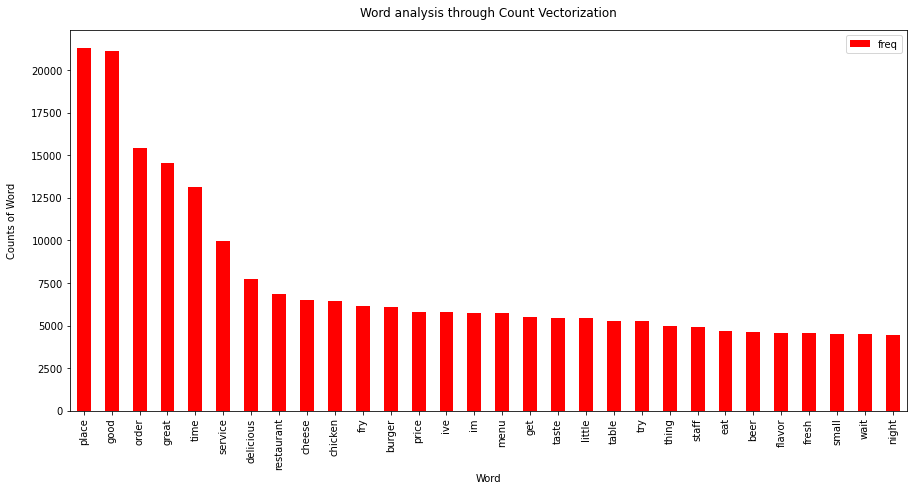

In [33]:
#CV for most common extracted nouns adjectives and verbs
#obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer #please reference above cell
#set X to encompass all tweet_text 
X = yelp_philly_merge['nouns_adjec']# only the nouns and adjectives of the reviews


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)


Order shows up here along with specific types of food such as fries, chicken and cheese. Portion size is referred to as small often. We can see that both service and food quality are important for a restaurants sucess but lets narrow it down more with word cloud 
__________________________________


### Using Word cloud to visualize nouns and adjectives

Word cloud is very efficient in visualizing text data in terms of frequency of word occurence for all the words. It creates a corpus of text for all the words and then returns the size of the word displayed based on the frequency.



##### Word cloud for nouns

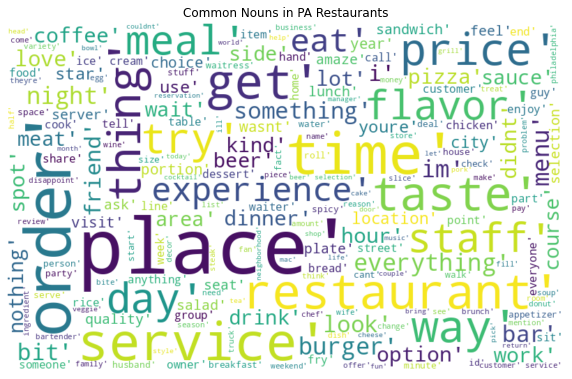

In [34]:
#import mathplot for the overall graph and sns as our vis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud#import library 
nouns =' '.join([text for text in yelp_philly_merge['extract_nouns']])#join all the text in the rows for the nouns only

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(nouns)#set to generate the frequency chart from nouns established from code above
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")#bilinear displays a smoother graph
plt.axis('off')
plt.title('Common Nouns in PA Restaurants')
plt.show()


Nouns is probably the most important contributor to a review because it tells us what we need to focus on improving. When we look at a word cloud we are visualizing the frequency and what is most talked about. In this case, order is larger than flavor- this means that the word order occurs more often but we cannot deduct that just because it has occured more in the corpus that it is more signifiicant
What we can say is that, in addition to service or food quality, we should also note the price of the restaurant 


We can also look at the adjectives

##### Word cloud for Adjectives

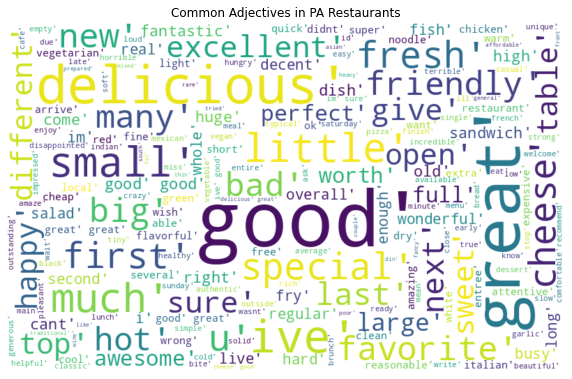

In [35]:
#see code above
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
adjectives =' '.join([text for text in yelp_philly_merge['extract_adjectives']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(adjectives)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Common Adjectives in PA Restaurants')
plt.show()


Unique adjectives that define service such as 'friendly', or defines food quality such as 'fresh' can be found here. These might be actions Mr. Cuban takes such as bringing fresh food and friendly staff


### Visualizing with Word2Vec


Why word2vec?

Word2vec will allow us to examine the words we see the word clouds and CV and to make appropriate business recommendations based on similarity of words. 

Word2Vec is a better form of visualization compared to word clouds and CV and it also feeds into the Neural Network Model better because the inputs are changed into vectors. This means that we can then later on feed it into a neural network as inputs. One of the biggest advantages word2vec has is the feature .most_similar. This allows us to find the top similar words looking at cosine similarity between the word's weights

Word to vec uses cosine similarity to measure scores from 0-1 with 1 being highly similiar with another word. For further reading and computation purposes please consult: https://www.machinelearningplus.com/nlp/cosine-similarity/

**This helps solve our business problem by identifying similiar words to service and quality so that we can make recommendations based what adjectives and nouns are associated with food quality and service**



In [36]:
from gensim.models import Word2Vec
from nltk import word_tokenize# we want a simple tokenizer

In [37]:
#tokenize so that we can get a list of words
corpus =  yelp_philly_merge['nouns_adjec'].map(word_tokenize)

In [38]:
corpus[0:5]

0    [heart, philadelphia, female, cashier, pastry,...
1    [bakery, variety, bun, pastry, bun, mung, coco...
2    [kind, service, everyone, treat, treat, judgem...
3    [order, graduation, event, staffniece, perfect...
4    [milk, saint, honore, pastry, business, boyfri...
Name: nouns_adjec, dtype: object

Word 2 vec:

Ensure worker=1 for reproducibility purposes 

In [39]:
#min count = 1 for freq 
#vectorsize = 300 
#windows = amount it will go left and right to search for words
#ensure worker =1 for reproducibility
model = Word2Vec(corpus, size=300, min_count = 1, window = 10, workers =1)

Word2vec's cosine similarity score: we can find words that are similiar to certain specified words such as Service and Food. This then can tell us that the review tends to have these two words and if they make enough sense, we might be able to make some implications. However it does not tell us if the resturant will be succesesful. 

Instead

It paints a bigger picture on what the entire corpus is talking about and gives us generalized actions that people usually are talking about when a particular word is mentioned in a review.

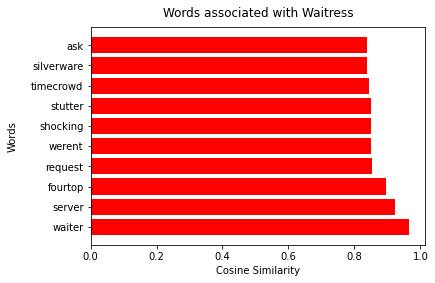

In [40]:
#create a list that appears most similar to the word waitress
warnings.filterwarnings("ignore", category=DeprecationWarning) 
list_model_manager= model.most_similar(positive = ['waitress'])
list_model_manager
word = []
frequency = []

#what this function does is that it takes the word and frequency counts for the list list_model_manager
for i in range(len(list_model_manager)):
  """
  This funcction will append the word and frequency as values next to each other based on their cosine similiarty
  """
  word.append(list_model_manager[i][0]) #get the i position and pos 0 for word
  frequency.append(list_model_manager[i][1]) # get the i position again and pos2 for the frequency of the word

#plot as bar
plt.barh(word, frequency, color='r')
plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Waitress", y=1.02)
plt.show()


We use the word Waitress for service. When we look at this similaritiy chart we can deduce a few implications:

As per silverware: Waiters should be more careful with silverware presentation

As per "request" and "timecrowd" (timecrowd may mean time related to crowds): Waiters should be careful with time management

Ask per ask: Waiters should be vigilent about the customer's needs because you dont want the customer to constantly ask for the waiter.

**These words show us what we expect waiters to do if they open a restuarant again, if not they can remain a delivery only place so that Mr. Cuban can save money on overhead cost**

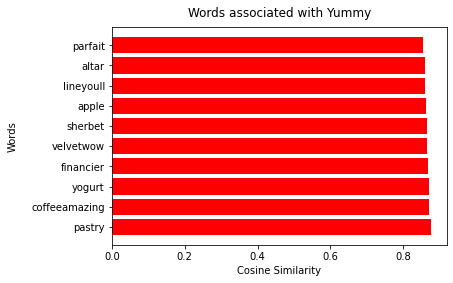

In [41]:
#look at above code for explanation: this time the word is yummy
list_model_manager= model.most_similar(positive=['yummy'])
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Yummy", y=1.02)
plt.show()


The positive foods associated with "yummy" seem to adhere to desserts (also coffee) which makes sense because the desert should be your last impression of the restuarant before the reviewer writes on yelp. People coming back from isolation may still have that sweet tooth. **A business recommendation I would make is to invest in good deserts based on the data shown**

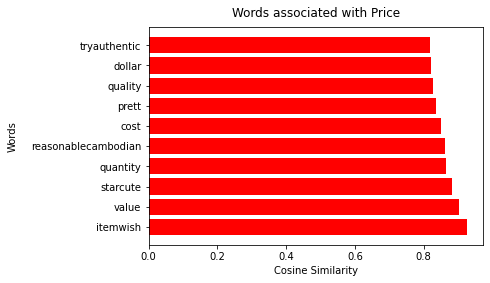

In [42]:
#look at above code for explanation: this time the word is price
list_model_manager= model.most_similar(positive=['price'])
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Price", y=1.02)
plt.show()


For price we see that if Mr. Cuban has any cambodian resturants at hand then he should invest more in them because it is positively associated with price (maybe its a good price). 

The quantity of the food is greater in similiarity to Price than the quality of the food, that might be worth considering if Mr. Cuban wants to improve food quality.

#Modeling 

##  Continuing From Notebook 1:

From Notebook 1 we saw that the MultiNomialNB (MNB) algo outperformed RandomForest (RF) by 1% (73-72%) but the recall and precision score was 66% to 52%. This indicates that maybe a better model such as a neural network would help us evaluate our EDA findings.

### Keras model
The idea behind moving towards this model is to improve accuracy and also introduce some sort of evaluation. Keras is perfect for this because it makes sure that the activation threshold (sigmoidal) is there, which is similar to RF and MNB's algorithim but the difference is that we have an hidden layer with weights. These weights are directly linked to the activation threshold and are constantly readjusted, which is not done as in RF or MNB.

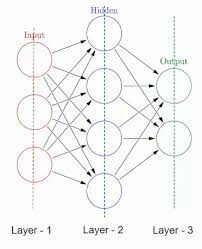

The 3 layers are the input, the word embedding, and the output layer. The words first become one hot encoded, then they have the rest of the vector length padded (so they're all the same length). They are fed into layer 1 as inputted vector form. Layer 2 is our hidden layer (the one we save) layer 3 is the output layer (3.5 stars or higher prediction to help assess accuracy). The final layer has to flatten out the array to match the row with padding length of numbers.

In [43]:
#idea from https://www.youtube.com/watch?v=Fuw0wv3X-0o
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot #this one hots the sequence with tensor
from tensorflow.keras.preprocessing.sequence import pad_sequences #matches arrays to make 0s post or pre
from tensorflow.keras.models import Sequential #layer of network models
from tensorflow.keras.layers import Dense #our specific one
from tensorflow.keras.layers import Flatten #output layer
from tensorflow.keras.layers import Embedding #embedding layer

In [44]:
#take all the values for a large corpus to prepare for one hot encoding through keras
for_keras= yelp_philly_merge['nouns_adjec'].values

In [45]:
#vocab size is 300 words to start
vocab_size = 300
encoded_reviews = [one_hot(x, vocab_size) for x in for_keras]

In [46]:
#max length of array to 10 because of industry standards
max_length = 10
#get padded reviews for to get 0 if max length is reached (post) to X
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[142  59 231 ...  25 152  48]
 [252   8 205 ... 171 143 253]
 [  3 122 276 ... 297 135  95]
 ...
 [186 111  63 ...   0   0   0]
 [283  68 180 ... 194  72 111]
 [206  34   3 ... 297 269  48]]


In [47]:
#embedded vector size is how many vectors we want for the word (dimensions)
#this model will take the embedding layer first with the variables and their parameters inputted
embeded_vector_size = 5 # ^ 
model = Sequential() #we want to add sequentially
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name = "embedding"))  #max length of array, 5 dimensions, vocab size is 300
model.add(Flatten())#used for output layer
model.add(Dense(1, activation='sigmoid')) # activate sigmoid so that its 0 or 1, as in our output created below

In [48]:
#we need to flatten and change output to classification
#mark cuban needs stars 3.5 or higher because thats the average rating of his resturants
def stars_transform(x):
  if x >= 3.5:
    return 1
  else:
    return 0 
yelp_philly_merge['stars_x'] = yelp_philly_merge['stars_x'].apply(stars_transform)

In [49]:
sentiment = yelp_philly_merge['stars_x'].values.flatten()
X= None
X = padded_reviews
y=sentiment

In [50]:
#using adam as our standard gradient descent 
#loss is binarycross entropy because its between true and predicted classes (roc_auc)
#we use accuracy this time for our final metric
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 5)             1500      
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [51]:
#fit
#epoch is the number of times the algorithim will work through the whole set
#verbose is just telling us the progress of epochs
model.fit(X, y, epochs=50, verbose=0)

In [52]:
#evaluate the model
loss, accuracy = model.evaluate(X,y)
accuracy

1172/1172 [==============================] - 2s 1ms/step - loss: 0.3162 - accuracy: 0.8804


0.8804278373718262

I expected a higher accuracy but its ability to predict the score given just the nouns and adjectives of reviews is very impressive. 

Also because we see an immediate improvement in accuracy in this keras model (from notebook 1's MNB of 66%), we are prompted to introduce a train test split using sklearn.

In [53]:
#increase vocab size
vocab_size = 1000
max_length = 10
embeded_vector_size = 5
encoded_reviews = None
encoded_reviews = [one_hot(x, vocab_size) for x in for_keras]


In [54]:
padded_reviews = None 
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')

In [55]:
#set model to none
model = None
model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name = "embedding")) 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) # activate sigmoid so that its 0 or 1, as in our output created below

In [56]:
#from SK learn we use train test split for our data 3 parts train : 1 test)
from sklearn.model_selection import train_test_split
X = None
X = padded_reviews
y = sentiment


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [57]:
#compile model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 5)             5000      
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,051
Trainable params: 5,051
Non-trainable params: 0
_________________________________________________________________


In [58]:
#fit
model.fit(X_train, y_train, epochs=50, verbose=0)

Model Evaluation with X_ test_ & y_test

In [59]:
#looking at x_test and y_test
loss, accuracy = model.evaluate(X_test,y_test)
accuracy

293/293 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.8554


0.855435848236084

86% is amazing for our test data. Overall, the nouns and adjectives obtained from Named Entity Recognitions were accurate in predicting if nouns and adjectives can help Mr. Cuban distuginuish himself from the other 3.5 stars restaurants in the area. I know that validation is suppose to occur but we can just keep training this text on other review in other restaurants in other states using the same yelp data. Overall, no matter what it will get better as exhibited in BERT and so many language learning models.

Let's save it first

In [60]:
import tensorflow as tf # save as .h5 format

model.save('model_88.h5')

In [61]:
#get embeddings
embeddings = model.get_layer('embedding').get_weights()[0]

In [62]:
#save embeddings as np 
np.save('word_embeddings.npy', embeddings)

In [63]:
#download
model = tf.keras.models.load_model('model_88.h5')
word_embeddings = np.load('word_embeddings.npy')

# Getting the words back into a pandas dataframe

The following function will :

- first help us use the weights given to us by the layer

- second stick them to the original corpus so that we can obtain the words back from the model results by making a dictionary

- third then finally allow us compare similarity scores between words used in the neural network

In [64]:
#now we create a dictionary based on the word embeddings for the entire "for keras from before)
from keras.preprocessing.text import Tokenizer
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer = Tokenizer(num_words=vocab_size) # use this to tokenize
#This class allows to vectorize a text corpus, by turning each text into sequence of integers (each integer being the index of a token in a dictionary) aka vector
tokenizer.fit_on_texts(for_keras) #fit this onto our keras list of text
word_index = tokenizer.word_index #create a word: int index
word_index2 = dict([(value, key) for (key, value) in word_index.items()]) #create the dictionary so that you can have the word count frequency table

# create a dictionary that maps the word vectors back to their corresponding words
word_vector_dict = {}
for i in range(1, len(embeddings)):#take the second column of embeddings
    word = word_index2[i] #take the reversed for words
    vector = embeddings[i] #take the value of the embedding
    word_vector_dict[word] = vector #populate the blank dictionary word:vector as you go through the dictionary

In [65]:
#this is our dictionary from keras
len(word_vector_dict)

999

In [66]:
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CosineSimilarity
#find the angle of the two vectors 
from sklearn.metrics.pairwise import cosine_similarity#thank you sklearn for manually calculating cosine sim
def calc_cosine_similarity(a, b):
  """
  #this function will use our word dictionary and give us the cosine similarity scores given the word_vector_dictionary we just made
  """
  #we know that x, y need to be in the forms of an array 
  return cosine_similarity(a.reshape(1,-1), b.reshape(1,-1))[0][0]## these two are so that what you return is an integer not a string within a string

In [67]:
#as we can see there is a negative correlation in this sample
cosine_sim = calc_cosine_similarity(word_vector_dict['waiter'], word_vector_dict['ask'])
print(cosine_sim)

0.54963994


We see a cosine similarity of .55 and this means that waiter and ask are positively correlated and thus are more likely to appear in a review. Whether that review is above 3.5 stars or less, it still means that Mr. Cuban can help distinguish himself and put him in a better category

In [68]:
#obtain all the arrays
similarity = cosine_similarity(list(word_vector_dict.values()))
#similarity is the value of the array given the column and row names as the key
pandas_df = pd.DataFrame(similarity, columns=word_vector_dict.keys(), index=word_vector_dict.keys())
pandas_df.head(5)

,place,good,order,great,time,service,delicious,restaurant,cheese,chicken,...,odd,explain,foie,child,croissant,delightful,cookie,term,burnt,fork
place,1.000000,0.779792,0.539058,0.742731,-0.391480,-0.148002,-0.192785,-0.171035,0.377944,-0.045640,...,-0.287255,-0.264973,-0.316550,0.418446,-0.213115,0.017058,-0.435227,-0.246196,-0.586113,0.008832
good,0.779792,1.000000,0.385021,0.595935,-0.044783,-0.418605,0.163888,0.093429,-0.224532,-0.039861,...,-0.323800,-0.514441,-0.621365,0.316710,0.213942,-0.466424,-0.257179,-0.360183,-0.159581,0.356544
order,0.539058,0.385021,1.000000,0.487505,0.099428,-0.415379,0.267102,0.498436,0.001453,-0.219839,...,-0.598804,0.080128,-0.600475,0.266770,-0.357547,-0.402876,-0.035946,0.650727,-0.236379,-0.245549
great,0.742731,0.595935,0.487505,1.000000,-0.162236,0.014555,0.378883,-0.313563,0.081086,0.420667,...,-0.786248,-0.067662,0.003782,0.475878,0.310104,0.161406,-0.115952,-0.054778,-0.286369,0.089969
time,-0.391480,-0.044783,0.099428,-0.162236,1.000000,-0.774905,0.594188,0.194079,-0.763796,-0.452643,...,-0.228734,-0.538399,-0.209225,-0.742832,0.307435,-0.473859,-0.223047,0.236014,0.061619,-0.406702


Now we can find the same similarity scores for: words that can help mark cuban distinguish his restaurants

In [69]:
#https://www.w3schools.com/python/pandas/ref_df_nlargest.asp#:~:text=The%20nlargest()%20method%20returns,value%20for%20a%20specified%20column.
pandas_df.server.nlargest(10)

server     1.000000
havent     0.970735
butter     0.951097
new        0.947116
falafel    0.930003
fix        0.912505
loud       0.907615
bottle     0.898532
like       0.891752
window     0.882002
Name: server, dtype: float32

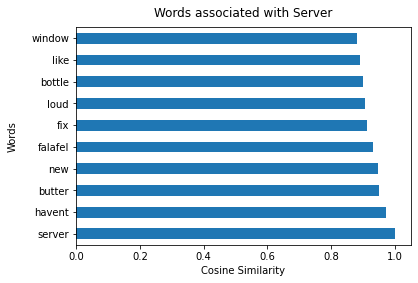

In [70]:
pandas_df.server.nlargest(10).plot(kind='barh')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Server", y=1.02)
plt.show()
 

With the NN model we see that providing butter to your food, making the place look new by fixing it and having loud servers that can talk over the noise can contribute to a review that helps Mr. Cuban move up.


Negative correlations

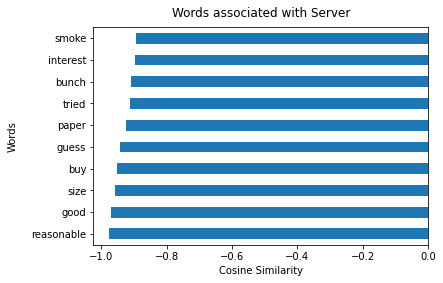

In [71]:
pandas_df.server.nsmallest(10).plot(kind='barh')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Server", y=1.02)
plt.show()


Reasonable servers are not associated with server, which means that waiters should be automatic and stick to a system every time. Tired workers that smoke are negatively correlated with servers, or if they always bunch up. Thus these negative correlations imply traits servers should not have.


Food

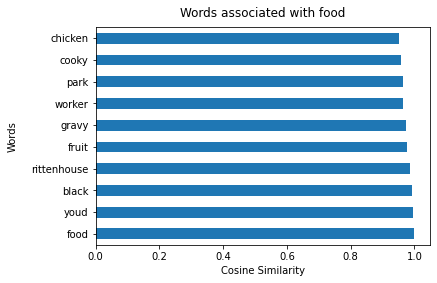

In [81]:
pandas_df.food.nlargest(10).plot(kind='barh')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with food", y=1.02)
plt.show()


It seems that fruits (desert), gravy and other condiments are associated with food. Thus Mr. Cuban should give these out at the lowest cost to save money. Additionally we see worker being associated with food- this may lead to a lot of further research into the matter


# Discussion From Notebook 1 

1. We have established through vader sentiment, that ambuguity of a review may give less impactful words (neutural words dont contribute to business driven actions) so in order to have the best corpus, we would select the full length reviews over the tips.

2. MNB shows us that the more distinguished words of a review are (less correlation with other words) in their vectorized forms, then precision goes up. So we would expect similar words to have similar related words in future analysis

# Discussion for Notebook 2

1. It is much easier to find words related to food, for instance using word to vec we were able to find that having deserts at the end leaves a positive review leading to more possible business

2. Reviews with the word waiter are strongly correlated with mannerism. Your waiters are representative of the store and they always be asking about diet considerations and walking around with pitchers of water, as seen in our word2vec models.

3. The extracted nouns and adjectives have an accuracy in both test and validation samples of 88% which predicts if Mr Cuban's restaurant will improve with just said nouns and adjective that are hidden in the word-embedded layer.

**From the model **
4. Servers should not huddle up when they're not busy or smoke.

5. Servers should be unique, this might be important when Mr. Cuban hires them. It is important to look at how we give away free condiments and work on investing in deserts- this will lead to more positive reviews.

# Overall Conclusion

What we saw in the eda about the sevrer's behavior is important to helping Mr. Cuban grow his business and distinguish himselff from 3.5 stars and aim to achieve better. He has a model that is 88% accurate in predicting nouns and adjectives from a review which can highlight important business actions.

He will want to hire friendly staff that are different and unique. They should maintain some distance when it comes to taking orders and be vigalent on whoever needs their attention. We can train staff on these procedures

He will also want to rethink certain establishments of his, mussel and sandwich shops are positively associated with the word "food". Thus to improve food he might want to invest in these type of establishments if he has any. Also from the EDA he will want to increase the investment in desserts because they are correlated with food as well!

If he takes these actions then he will truly seperate himself from other 3.5 restaurants.